# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [55]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here 
  
  if(Distance_Type == "Euclidean"):
    
    new_array = np.sqrt(np.square(Data_points - Cluster_Centroids[0]).sum(axis = 1))
    Cluster_Distance = new_array
    Cluster_Distance.shape = (Data_points.shape[0],1)

    for i in range(1, Cluster_Centroids.shape[0]): 
      new_array = np.sqrt(np.square(Data_points - Cluster_Centroids[i]).sum(axis = 1))
      new_array.shape = (Data_points.shape[0],1)
      Cluster_Distance = np.concatenate((Cluster_Distance, new_array), axis=1)
  
  else:
    Cluster_Distance = []

  return Cluster_Distance 


In [139]:
cluser = np.array([[1,1], [9,9]])
cluser1 = np.array([[1,1], [9,9]])

print(np.array_equal(cluser, cluser1))

True


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [79]:
import random

In [169]:
def findElement(array, element):
  for i in range(0, array.shape[1]):
    if element == array[0][i]:
      return i
  return -1   

In [170]:
def findClusterIndex(Cluster_Distance, Number_of_Clusters):
  cluster_index = np.zeros([Cluster_Distance.shape[0], 1], dtype=int)

  for i in range(Cluster_Distance.shape[0]):
    cluster = Cluster_Distance[i]
    cluster.shape = (1, Number_of_Clusters)
    cluster_index[i][0] = findElement(cluster, cluster.min())

  return cluster_index  

In [283]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
  # write code for intial cluster heads here 

  Cluster_Centroids = []

  if(Number_of_Clusters > 0):
    Cluster_Centroids = random.choice(Data_points)
    Cluster_Centroids.shape = (1,Data_points.shape[1])

  for i in range(1, Number_of_Clusters):
    random_centroid = random.choice(Data_points)
    random_centroid.shape = (1,Data_points.shape[1])

    while(random_centroid in Cluster_Centroids):
      random_centroid = random.choice(Data_points)
      random_centroid.shape = (1,Data_points.shape[1])

    Cluster_Centroids = np.concatenate((Cluster_Centroids, random_centroid), axis=0) 

  # write your your loop 

  sum_each_cluster = np.zeros([Number_of_Clusters, Data_points.shape[1]])
  count_each_cluster = np.zeros([Number_of_Clusters, 1])

  while True: 
    Cluster_Distance = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
    cluster_index = findClusterIndex(Cluster_Distance, Number_of_Clusters)

    # update centroids

    for i in range(0, Cluster_Distance.shape[0]):
      sum_each_cluster[cluster_index[i][0]] = sum_each_cluster[cluster_index[i][0]] + Data_points[i]
      count_each_cluster[cluster_index[i][0]][0] = count_each_cluster[cluster_index[i][0]][0] + 1


    updated_centroids = sum_each_cluster / count_each_cluster
    updated_centroids = np.around(updated_centroids, decimals=4)

    if np.array_equal(Cluster_Centroids, updated_centroids): 
      break

    Cluster_Centroids = updated_centroids

  Final_Cluster_Distance =  GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type )
  Final_Cluster_Index = findClusterIndex(Final_Cluster_Distance, Number_of_Clusters)

  Cluster_Metric = np.zeros([1, Data_points.shape[1]])

  for i in range(0, Data_points.shape[0]):
    Cluster_Metric = Cluster_Metric + np.square(Data_points[i] - Cluster_Centroids[Final_Cluster_Index[i]])  

  temp = 0 

  for i in range(0, Cluster_Metric.shape[1]):
    temp = temp + np.square(Cluster_Metric[0][i])
  
  Cluster_Metric = np.sqrt(temp)

  Cluster_Metric = Cluster_Metric / Data_points.shape[0]

  # return Cluster_Centroids
  return [ Final_Cluster_Distance , Cluster_Metric ]    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [4]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [200]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

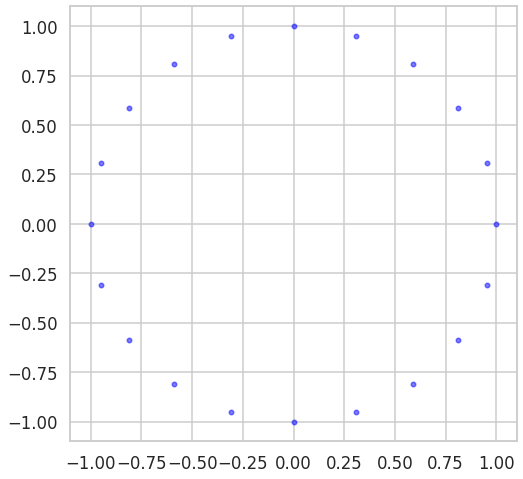

In [236]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X1)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

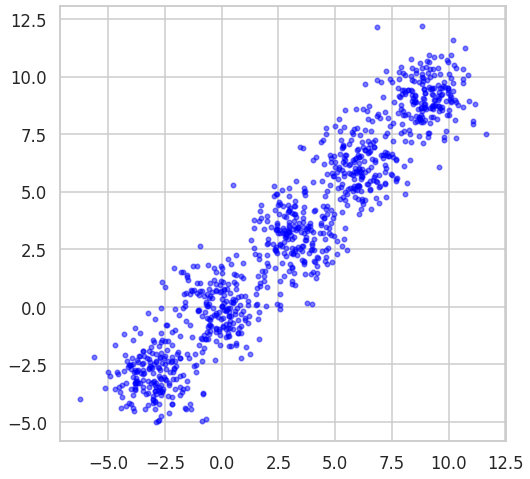

In [259]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

display_cluster(X2)

#### 2.3. Example 3 : moons Data Gen and display 

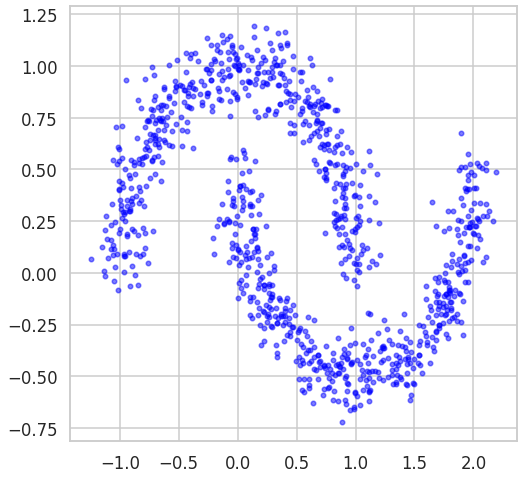

In [261]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

Example 1 

In [284]:
[ Final_Cluster_Distance2X1 , Cluster_Metric2X1 ]  = GUC_Kmean(X1, 2, "Euclidean")
[ Final_Cluster_Distance3X1 , Cluster_Metric3X1 ]  = GUC_Kmean(X1, 3, "Euclidean")
[ Final_Cluster_Distance4X1 , Cluster_Metric4X1 ]  = GUC_Kmean(X1, 4, "Euclidean")
[ Final_Cluster_Distance5X1 , Cluster_Metric5X1 ]  = GUC_Kmean(X1, 5, "Euclidean")
[ Final_Cluster_Distance6X1 , Cluster_Metric6X1 ]  = GUC_Kmean(X1, 6, "Euclidean")
[ Final_Cluster_Distance7X1 , Cluster_Metric7X1 ]  = GUC_Kmean(X1, 7, "Euclidean")
[ Final_Cluster_Distance8X1 , Cluster_Metric8X1 ]  = GUC_Kmean(X1, 8, "Euclidean")
[ Final_Cluster_Distance9X1 , Cluster_Metric9X1 ]  = GUC_Kmean(X1, 9, "Euclidean")
[ Final_Cluster_Distance10X1 , Cluster_Metric10X1 ]  = GUC_Kmean(X1, 10, "Euclidean")

In [285]:
Number_of_clusters = [2,3,4,5,6,7,8,9,10]
Cluster_Metrics1 = [Cluster_Metric2X1,Cluster_Metric3X1,Cluster_Metric4X1,Cluster_Metric5X1,Cluster_Metric6X1,Cluster_Metric7X1,
                   Cluster_Metric8X1,Cluster_Metric9X1,Cluster_Metric10X1]


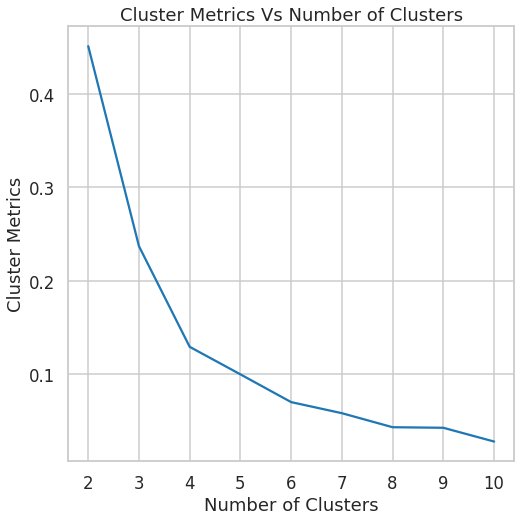

In [286]:
import matplotlib.pyplot as plt
  
plt.plot(Number_of_clusters, Cluster_Metrics1)
plt.title('Cluster Metrics Vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metrics')
plt.show()

Example 2

In [287]:
[ Final_Cluster_Distance2X2 , Cluster_Metric2X2 ]  = GUC_Kmean(X2, 2, "Euclidean")
[ Final_Cluster_Distance3X2 , Cluster_Metric3X2 ]  = GUC_Kmean(X2, 3, "Euclidean")
[ Final_Cluster_Distance4X2 , Cluster_Metric4X2 ]  = GUC_Kmean(X2, 4, "Euclidean")
[ Final_Cluster_Distance5X2 , Cluster_Metric5X2 ]  = GUC_Kmean(X2, 5, "Euclidean")
[ Final_Cluster_Distance6X2 , Cluster_Metric6X2 ]  = GUC_Kmean(X2, 6, "Euclidean")
[ Final_Cluster_Distance7X2 , Cluster_Metric7X2 ]  = GUC_Kmean(X2, 7, "Euclidean")
[ Final_Cluster_Distance8X2 , Cluster_Metric8X2 ]  = GUC_Kmean(X2, 8, "Euclidean")
[ Final_Cluster_Distance9X2 , Cluster_Metric9X2 ]  = GUC_Kmean(X2, 9, "Euclidean")
[ Final_Cluster_Distance10X2 , Cluster_Metric10X2 ]  = GUC_Kmean(X2, 10, "Euclidean")

In [288]:
Cluster_Metrics2 = [Cluster_Metric2X2,Cluster_Metric3X2,Cluster_Metric4X2,Cluster_Metric5X2,Cluster_Metric6X2,Cluster_Metric7X2,
                   Cluster_Metric8X2,Cluster_Metric9X2,Cluster_Metric10X2]

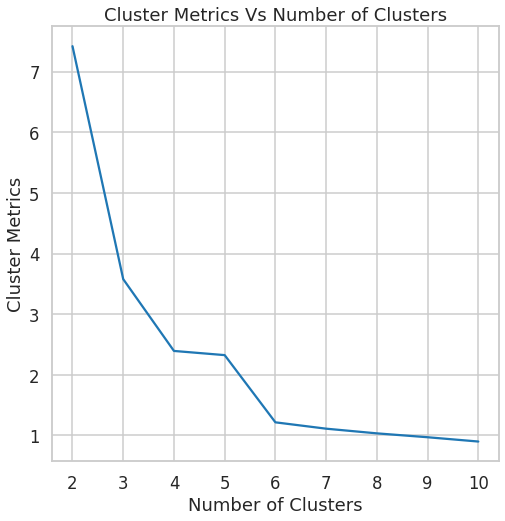

In [289]:
import matplotlib.pyplot as plt
  
plt.plot(Number_of_clusters, Cluster_Metrics2)
plt.title('Cluster Metrics Vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metrics')
plt.show()

Example 3

In [290]:
[ Final_Cluster_Distance2X3 , Cluster_Metric2X3 ]  = GUC_Kmean(X3, 2, "Euclidean")
[ Final_Cluster_Distance3X3 , Cluster_Metric3X3 ]  = GUC_Kmean(X3, 3, "Euclidean")
[ Final_Cluster_Distance4X3 , Cluster_Metric4X3 ]  = GUC_Kmean(X3, 4, "Euclidean")
[ Final_Cluster_Distance5X3 , Cluster_Metric5X3 ]  = GUC_Kmean(X3, 5, "Euclidean")
[ Final_Cluster_Distance6X3 , Cluster_Metric6X3 ]  = GUC_Kmean(X3, 6, "Euclidean")
[ Final_Cluster_Distance7X3 , Cluster_Metric7X3 ]  = GUC_Kmean(X3, 7, "Euclidean")
[ Final_Cluster_Distance8X3 , Cluster_Metric8X3 ]  = GUC_Kmean(X3, 8, "Euclidean")
[ Final_Cluster_Distance9X3 , Cluster_Metric9X3 ]  = GUC_Kmean(X3, 9, "Euclidean")
[ Final_Cluster_Distance10X3 , Cluster_Metric10X3 ]  = GUC_Kmean(X3, 10, "Euclidean")

In [266]:
Cluster_Metrics3 = [Cluster_Metric2X3,Cluster_Metric3X3,Cluster_Metric4X3,Cluster_Metric5X3,Cluster_Metric6X3,Cluster_Metric7X3,
                   Cluster_Metric8X3,Cluster_Metric9X3,Cluster_Metric10X3]

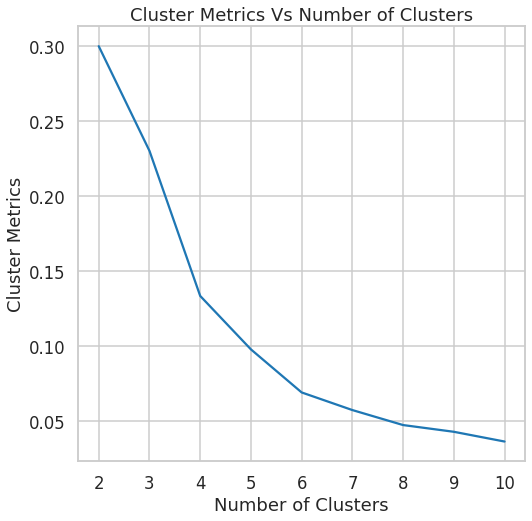

In [267]:
import matplotlib.pyplot as plt
  
plt.plot(Number_of_clusters, Cluster_Metrics3)
plt.title('Cluster Metrics Vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metrics')
plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [268]:
from google.colab import files
uploaded = files.upload()

Saving Customer data.csv to Customer data.csv


In [273]:
df_customer = pd.read_csv('/content/Customer data.csv')
df_customer.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [274]:
df_customer.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [278]:
XCustomer = df_customer.to_numpy()

In [ ]:
[ Final_Cluster_Distance2XCustomer , Cluster_Metric2XCustomer ]  = GUC_Kmean(XCustomer, 2, "Euclidean")
[ Final_Cluster_Distance3XCustomer , Cluster_Metric3XCustomer ]  = GUC_Kmean(XCustomer, 3, "Euclidean")
[ Final_Cluster_Distance4XCustomer , Cluster_Metric4XCustomer ]  = GUC_Kmean(XCustomer, 4, "Euclidean")
[ Final_Cluster_Distance5XCustomer , Cluster_Metric5XCustomer ]  = GUC_Kmean(XCustomer, 5, "Euclidean")
[ Final_Cluster_Distance6XCustomer , Cluster_Metric6XCustomer ]  = GUC_Kmean(XCustomer, 6, "Euclidean")
[ Final_Cluster_Distance7XCustomer , Cluster_Metric7XCustomer ]  = GUC_Kmean(XCustomer, 7, "Euclidean")
[ Final_Cluster_Distance8XCustomer , Cluster_Metric8XCustomer ]  = GUC_Kmean(XCustomer, 8, "Euclidean")
[ Final_Cluster_Distance9XCustomer , Cluster_Metric9XCustomer ]  = GUC_Kmean(XCustomer, 9, "Euclidean")
[ Final_Cluster_Distance10XCustomer , Cluster_Metric10XCustomer ]  = GUC_Kmean(XCustomer, 10, "Euclidean")

In [ ]:
Cluster_MetricsCustomer = [Cluster_Metric2XCustomer,Cluster_Metric3XCustomer,Cluster_Metric4XCustomer,Cluster_Metric5XCustomer,Cluster_Metric6XCustomer,Cluster_Metric7XCustomer,
                   Cluster_Metric8XCustomer,Cluster_Metric9XCustomer,Cluster_Metric10XCustomer]

In [ ]:
import matplotlib.pyplot as plt
  
plt.plot(Number_of_clusters, Cluster_MetricsCustomer)
plt.title('Cluster Metrics Vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metrics')
plt.show()